# Normalized PCA - Convert to Standard Normal, then Drop Peptides

**Normalized PCA**:  Although the ratio values are normalized on IP2, this normalization may not be as 'good' as needed for PCA, artifically inflating differences between N14 and N15 samples.  To account for this, the distribtuions are converted to standard normal via the transformation (value-mean)/sigma.  These distributions are compared, and PCA is performed with normalization occuring either early in the analysis (before N14 and N15 census files are combined) or late ini the analysis (right before dropping peptides uncommon to all samples)

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.append('..')
from scripts import census_parser as cp
%matplotlib inline

plot_defaults = dict(mpl.rcParams) # store plottiing defaults

import seaborn as sns

In [2]:
BASE_DIR = '../data'
l_tail = 'rawXtractor/census-out.txt'
h_tail = 'rawXtractor/n15_search/census-out.txt'

In [3]:
def make_pca_df(samples, group = '', clean = False, norm = True):
    dfs = []
    for sample in samples:
        light_file = os.path.join(BASE_DIR, sample, l_tail)
        heavy_file = os.path.join(BASE_DIR, sample, h_tail)
        dfs.append(list(cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = norm))) 
    if group:
        return cp.prep_for_pca(dfs, name = group, clean = clean)
    return cp.prep_for_pca(dfs, clean = clean)

---

## Looking at how the ditrubutions vary with normlization
We'll look at a probe-enriched sample first, since those tend to be a bit tricker to normalize (worst-case) 

### Log transformed, but NOT Standard Normalized

In [4]:
sample = '20160409-BioGlyCMK-Lys-N14N15-Pool'

Starting peptides:  2448
Peptides after Cleaning:  2409


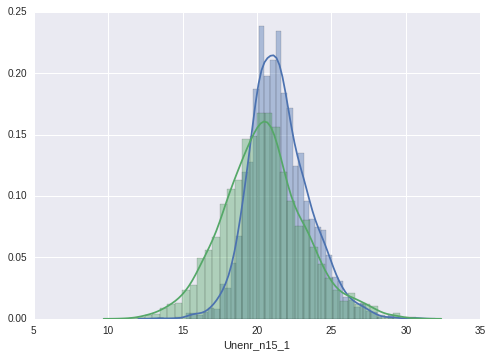

In [5]:
light_file = os.path.join(BASE_DIR, sample, l_tail)
heavy_file = os.path.join(BASE_DIR, sample, h_tail)

dfs = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = False)
df_unnorm = cp.prep_for_pca([dfs])
sns.distplot(df_unnorm.T.Unenr_n14_1)
sns.distplot(df_unnorm.T.Unenr_n15_1)

### Normalize on Import of data

Starting peptides:  2448
Peptides after Cleaning:  2409


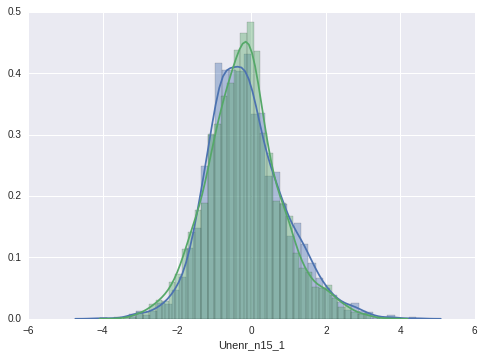

In [6]:
df = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = True)
df = cp.prep_for_pca([df])

sns.distplot(df.T.Unenr_n14_1)
sns.distplot(df.T.Unenr_n15_1)

### Normalize right before plotting

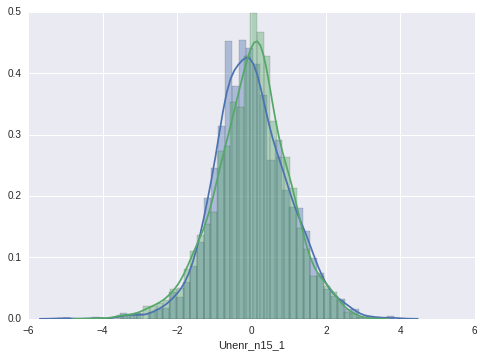

In [7]:
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n14_1))
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n15_1))

### Now try on an Unenriched Sample (generally better normailzed)

In [8]:
sample = '20160122-UnerFecal-Lys-N14N15-1121'

### Log transformed, but NOT Standard Normalized

Starting peptides:  1833
Peptides after Cleaning:  1803


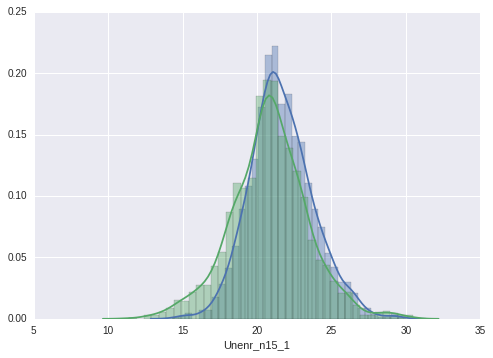

In [9]:
light_file = os.path.join(BASE_DIR, sample, l_tail)
heavy_file = os.path.join(BASE_DIR, sample, h_tail)

dfs = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = False)
df_unnorm = cp.prep_for_pca([dfs])
sns.distplot(df_unnorm.T.Unenr_n14_1)
sns.distplot(df_unnorm.T.Unenr_n15_1)

### Normalize on import of data

Starting peptides:  1833
Peptides after Cleaning:  1803


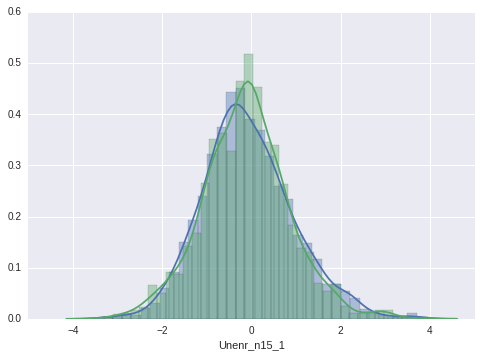

In [10]:
df = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = True)
df = cp.prep_for_pca([df])

sns.distplot(df.T.Unenr_n14_1)
sns.distplot(df.T.Unenr_n15_1)

### Normalize right before plotting

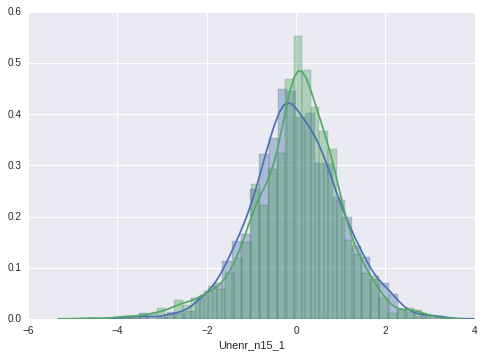

In [11]:
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n14_1))
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n15_1))

Differences are sublte between normalizations... hard to tell which is the better way to go, but both definitely look better than the original distribution

# Plot PCA for different sample combinations

See if these normalization styles have an effect on the overall plot

## Fist All unenriched samples collected so far

In [12]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121', '20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111', '20160331-UnerFecal-Lys-N14N15-Pool']
df = make_pca_df(samples, clean = True, norm = True)

Starting peptides:  4916
Peptides after Cleaning:  105


#### Plot with Early Normalization

explained variance ratios: [ 0.2690696   0.18583912]


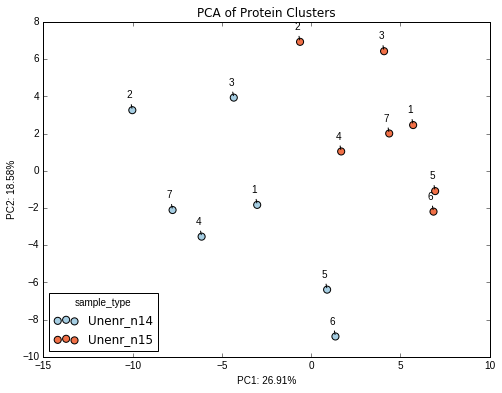

In [13]:
mpl.rcParams.update(plot_defaults) ## Reset Plotting to defaults
cp.plot_pca(df, labels = True, loc = 3)

#### Plot with Late Normalization

Starting peptides:  4916
Peptides after Cleaning:  105
explained variance ratios: [ 0.27887696  0.19699215]


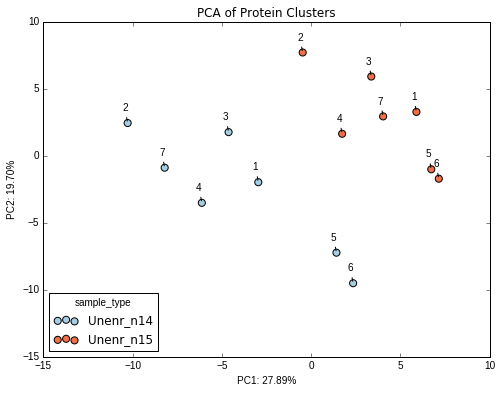

In [14]:
df = make_pca_df(samples, clean = False, norm = False)
df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 3)

Looks A very small amount different.....

## Just the Peptides from samples collected on 11/11/2015

In [15]:
samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
df = make_pca_df(samples, clean = True)

Starting peptides:  2841
Peptides after Cleaning:  504


#### Early Normalization

explained variance ratios: [ 0.43845287  0.30613245]


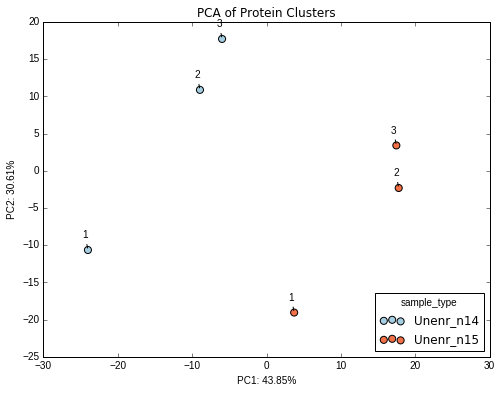

In [16]:
cp.plot_pca(df, labels = True, loc = 4)

#### Late Normalization

Starting peptides:  2841
Peptides after Cleaning:  504
explained variance ratios: [ 0.43140396  0.33055939]


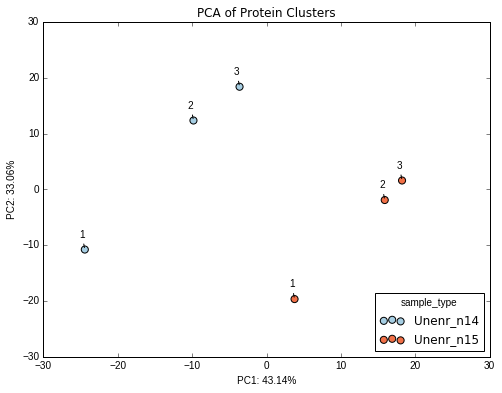

In [17]:
df = make_pca_df(samples, clean = False, norm = False)
df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 4)

## Just the Unenrciehd smaples collected on 11/21

In [18]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
df = make_pca_df(samples, clean = True)

Starting peptides:  2573
Peptides after Cleaning:  416


#### Early Normalization

explained variance ratios: [ 0.38555603  0.32946981]


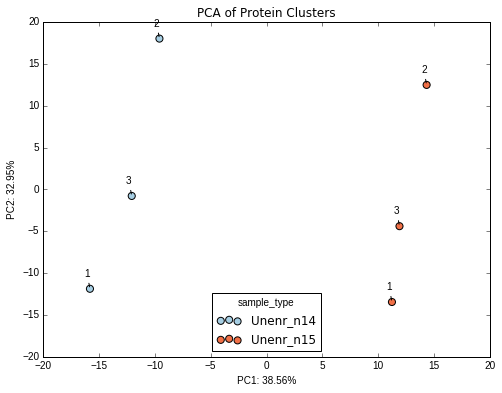

In [19]:
cp.plot_pca(df, loc = 8, labels = True)

#### Late Normalization

Starting peptides:  2573
Peptides after Cleaning:  416
explained variance ratios: [ 0.40428012  0.33384339]


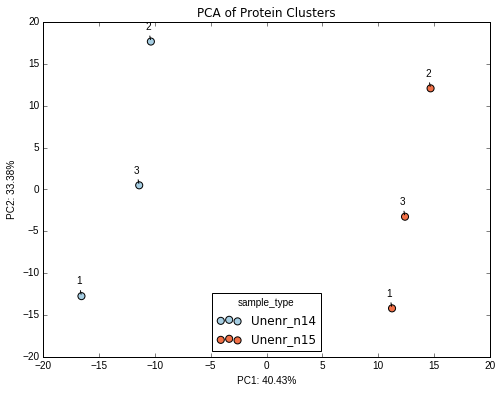

In [20]:
df = make_pca_df(samples, clean = False, norm = False)
df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 8)

## PCA Plot for the Enriched Samples Only

In [21]:
samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [22]:
df = make_pca_df(samples, clean = True, group = 'BioGlyCMK')

Starting peptides:  3243
Peptides after Cleaning:  505


#### Early Normalization

explained variance ratios: [ 0.44988901  0.28466108]


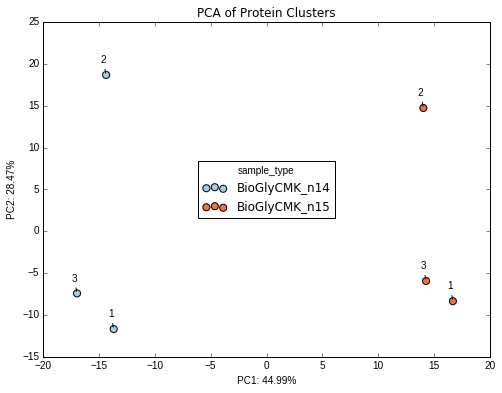

In [23]:
cp.plot_pca(df, loc = 10, labels = True)

#### Late Normalization

Starting peptides:  3243
Peptides after Cleaning:  505
explained variance ratios: [ 0.45346096  0.29411656]


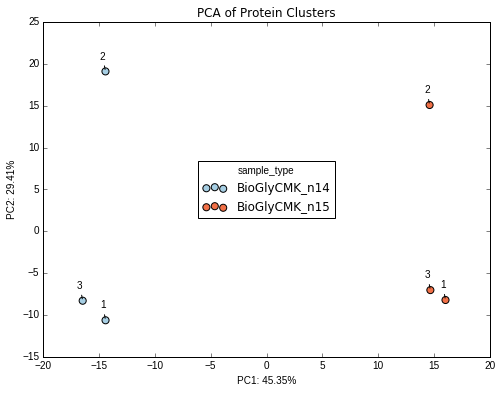

In [24]:
df = make_pca_df(samples, clean = False, norm = False, group = 'BioGlyCMK')
df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 10)

# Looking at a PCA with both the Unenriched and Enriched samples 

## Start with just 11/11 collection for Unenriched Dataset

In [25]:
unen_samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [26]:
dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  4919
Peptides after Cleaning:  178


#### Early Normalization

explained variance ratios: [ 0.31828122  0.24605222]


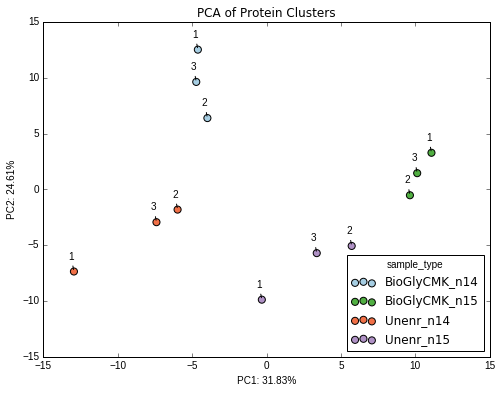

In [27]:
cp.plot_pca(df, loc = 4, labels = True)

#### Late Normalization

Starting peptides:  4919
Peptides after Cleaning:  178
explained variance ratios: [ 0.31284625  0.24159299]


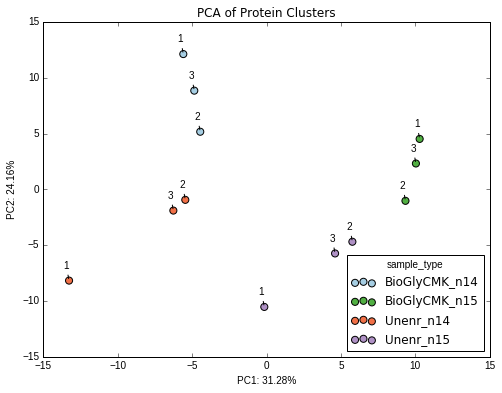

In [28]:
dfa = make_pca_df(unen_samples, norm = False)
dfb = make_pca_df(enr_samples, norm = False, group = 'BioGlyCMK')
df = pd.concat([dfa, dfb])

df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), loc = 4, labels = True)

Looks like there's still some good separation between n14 and n15, but there is also a separation between the probe enriched samples and the unenriched samples.  There is still a really strong mirror between N14 and N15 samples of the same MS run.

## Looking at Enriched vs 11/21/15 Unenriched Samples

In [29]:
unen_samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  5129
Peptides after Cleaning:  72


#### Early Normalization

explained variance ratios: [ 0.32534919  0.29646903]


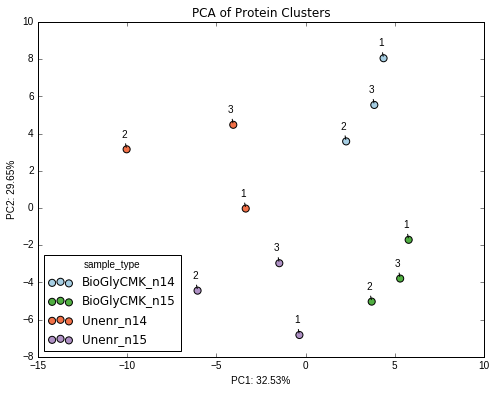

In [30]:
cp.plot_pca(df, loc=3, labels = True)

#### Late Normalization

Starting peptides:  5129
Peptides after Cleaning:  72
explained variance ratios: [ 0.33209199  0.3104938 ]


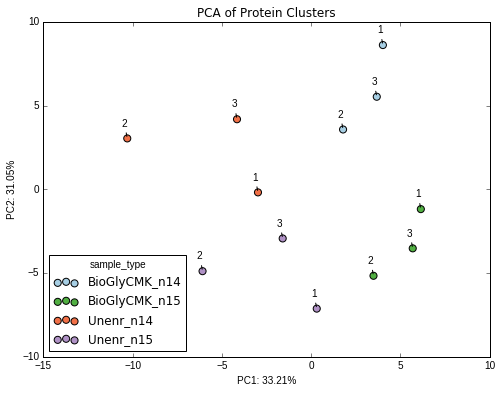

In [31]:
dfa = make_pca_df(unen_samples, norm = False)
dfb = make_pca_df(enr_samples, norm = False, group = 'BioGlyCMK')
df = pd.concat([dfa, dfb])

df = df.apply(cp.norm_integrations, axis = 1)

cp.plot_pca(cp.clean_pca_df(df), loc = 3, labels = True)